# Tarea 1
### Ejercicio 4

## Jonathan Alexis Urrutia Anguiano       41401102-5

In [1]:
from pylab import*
from numpy import*
%matplotlib inline
%run "Integradores_a_utilizar.ipynb"

Se va a resolver el siguiente sistema de ecuaciones y se graficarán los resultados en los plano $xy$, $xz$ y $yz$

\begin{align}
x' &= 10(y-x)\\
y' &= x(28-z)-y\\
z' &= xy-\frac{8}{3}z
\end{align}

Las condiciones iniciales serán al azar y deben ser un número entre -5 y 5

In [2]:
def sist(r,t):
    return array([10*(r[1]-r[0]),r[0]*(28-r[2])-r[1],r[0]*r[1]-8.0*r[2]/3.0])

In [3]:
x0 , y0, z0 = 10*rand()-5, 10*rand()-5, 10*rand()-5
print x0
print y0
print z0

1.93120678214
0.156594046429
3.18830016718


In [27]:
t, sol = rk4(sist,[x0,y0,z0],[0,200],0,.001)

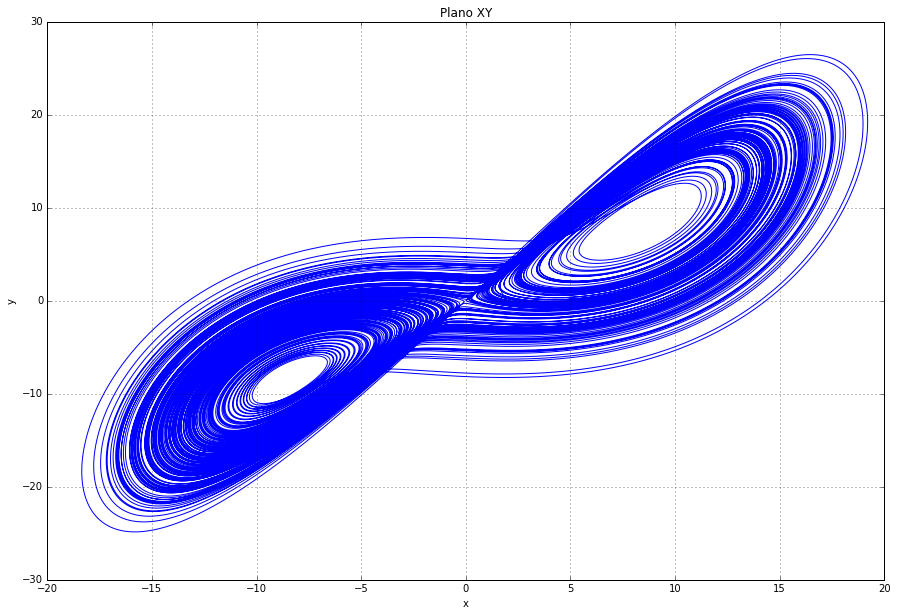

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
title('Plano XY'),xlabel('x'),ylabel('y')
grid(True)
ax.plot(sol[:,0],sol[:,1])
show()

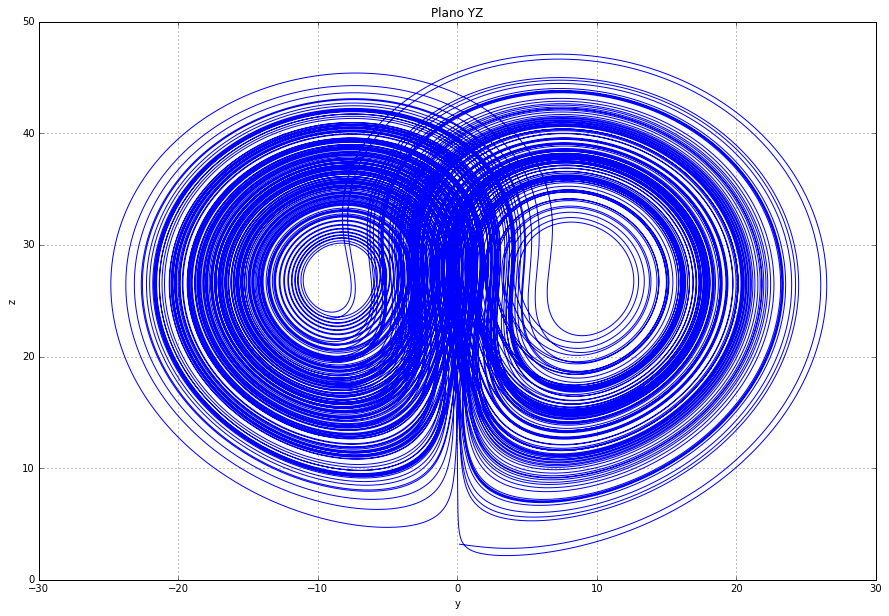

In [29]:
fig, ax = plt.subplots(figsize=(15, 10))
title('Plano YZ'),xlabel('y'),ylabel('z')
grid(True)
ax.plot(sol[:,1],sol[:,2])
show()

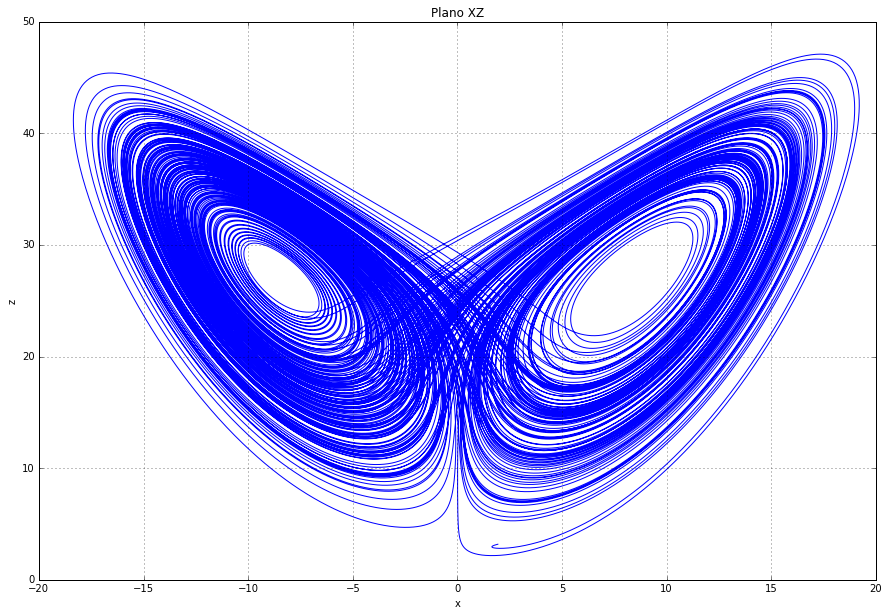

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
title('Plano XZ'),xlabel('x'),ylabel('z')
grid(True)
ax.plot(sol[:,0],sol[:,2])
show()

Ahora vamos a agarrar tres soluciones tales que las condiciones iniciales en y no cambien más que en dos décimas y se harán las etiquetas para cunado se desee graficar

In [8]:
condiciones= zeros((3,3))
for i in xrange(3):
            condiciones[i]=[x0,y0+.01*i, z0]                          
print condiciones

et=[]
for i in xrange(3):
    a='y0=%s' % (condiciones[i,1])
    et.append(a)
    
print et

[[ 1.93120678  0.15659405  3.18830017]
 [ 1.93120678  0.16659405  3.18830017]
 [ 1.93120678  0.17659405  3.18830017]]
['y0=0.156594046429', 'y0=0.166594046429', 'y0=0.176594046429']


A continuación se muestran las gráficas de las soluciones al sistema de ecuaciones

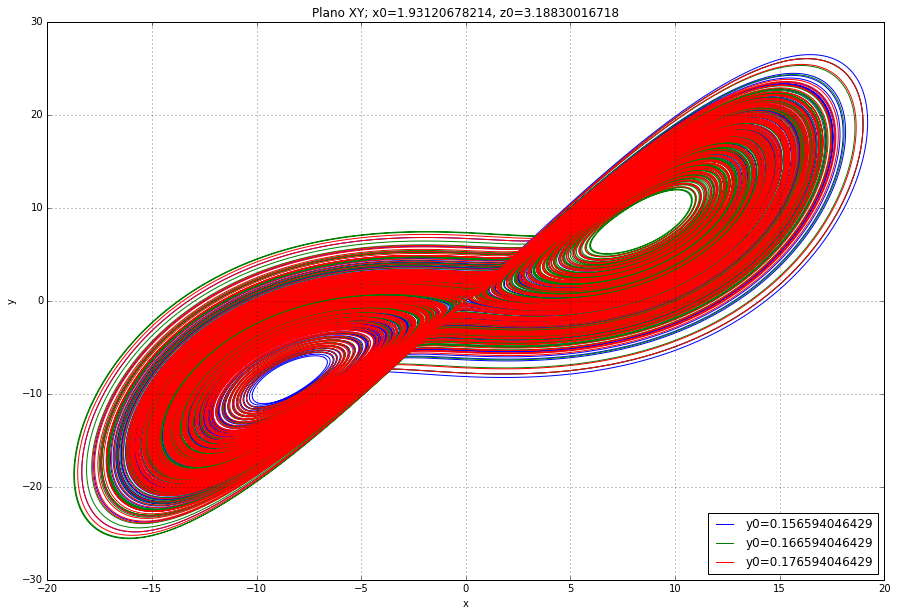

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))
title('Plano XY; x0=%s, z0=%s'%(x0,z0)),xlabel('x'),ylabel('y')
grid(True)

for i in xrange(3):
    t, sol = rk4(sist,condiciones[i],[0,200],0,.001)
    ax.plot(sol[:,0],sol[:,1],label = et[i])
ax.legend(loc='lower right')
show()

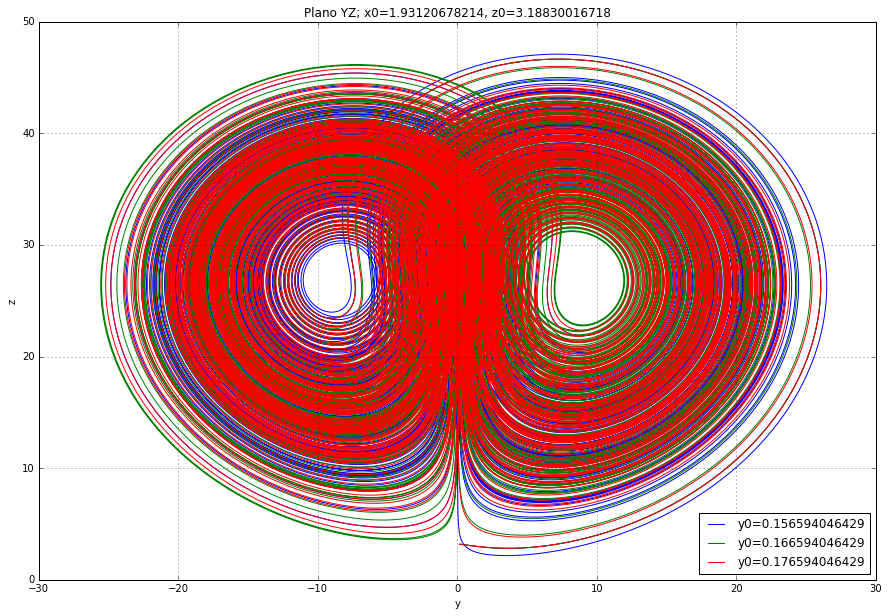

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
title('Plano YZ; x0=%s, z0=%s'%(x0,z0)),xlabel('y'),ylabel('z')
grid(True)

for i in xrange(3):
    t, sol = rk4(sist,condiciones[i],[0,200],0,.001)
    ax.plot(sol[:,1],sol[:,2],label = et[i])
ax.legend(loc='lower right')
show()

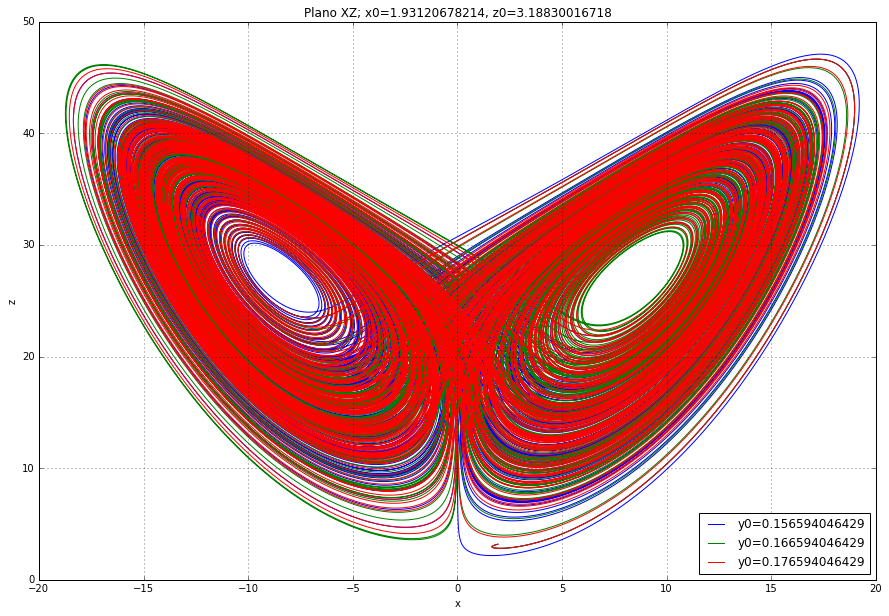

In [26]:
fig, ax = plt.subplots(figsize=(15, 10))
title('Plano XZ; x0=%s, z0=%s'%(x0,z0)),xlabel('x'),ylabel('z')
grid(True)

for i in xrange(3):
    t, sol = rk4(sist,condiciones[i],[0,200],0,.001)
    ax.plot(sol[:,0],sol[:,2],label = et[i])
ax.legend(loc='lower right')
show()

En las tres proyecciones graficadas arriba se observa que aunque la única diferencia en las condiciones iniciales haya sido en una coordenada y haya sido una diferencia en la segunda cifra decimal entre cada caso, para el valor de y más alto, las curvas descritas se alejan de los puntos de los que giran en menor medida que en los otros casos (observar la trayectoria roja).

Observando las trayectorias verdes y azules, en todas las proyecciones, cada una representa un caso extremo segun los valores sean positivos o negativos. Es decir en el plano XZ, la trayectoria azul fue la mas alejada del centro de giro mientras la verde fue la más cercana en algún momento para valores positivos de x. Lo mismo ocurre en el plano ZY para valores positivos de y. El papel de las trayecyorias se invierte si se toman ahora los valores de x,y negativos.

En el plano XY se ve este mismo comportamiento pero ahora la referencia es (aparentemente) la función $y=x$. Un análisis de las proyecciones, nos puede estar hablando de un comportamiento antisimétrico no sólo respecto a un plano en el espacio para las condiciones iniciales escogidas.

Cuando se observa el comportamiento de una sola solución (con las mismas condiciones que la trayectoria azul) se nota que la antisimetría del plano sigue presente y de hecho que sí hay un punto  por el que orbita la solución preferente a el otro.